ANN
TLU(threshold logic unit), linear threshold unit(LTU)
activation function:
1.sigmoid function(y=1/(1+e^(-x)))
2.relu(y=max(0,x))
3.step function:
3.1 heaviside(z) = (z>=0)?1:0


Perceptron
the decision boundary of each output neuron is linear, perceptrons are incapable of learning complex patterns. 
Perceptron convergence theorem:
if the training instances are linearly separable, this algorithm would converge to a solution

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int) #if iris setosa, output 1, otherwise 0

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


In [25]:
note that perceptron make predictions based on a hard threshold, hwile logistic regression classifier outpu a class probability.
XOR cannot be solved by using perceptrons or any other linear classification model including logistic regression model. However, a simple transformation to the feature space, like x1 * x2 this kind of nonlinear feature allows logistic regression to learn a decision.

by stacking multiple perceptrons, which is called MLP(multiple perceptron) could solve this problem.

check book page288 to see how it could solve XOR problem

SyntaxError: invalid syntax (<ipython-input-25-53e01c846747>, line 1)

In [ ]:
MLP:
input layer
hidden layer
output layer

1. the layers that close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers
2. every layers except output layers includes a bias neuron and is fully connected to the next layer

In [ ]:
Batch Gradient descent: batch size = size of training set
stochastic gradient descent. batch size =1
mini-batch gradient descent. 1<batch size<size of training set

it is important to initialize all the hidden layers' connectin weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundres of neurons per layer, your model will act as if it had one one neuron per layer: it won't be smart. If instead you randomly initialize the weights, you break the symmetry and allow backprograpation to train a diverse team of neurons.

In [ ]:
change perceptron step function to MLP sigmoid function

* step function
* sigmoid function
* hyperbolic tangent function:
tanh(z) = sinh(x)/cosh(x)   #https://www.mathworks.com/help/matlab/ref/tanh.html
that range tends to make each layer's output more or less centered around 0 at the beginning of training, which oftern helps speed up convergence
* ReLU(z) = max(0,z)
slope changes abruptly and its derivative is 0 for z<0, in pratice it has become the default since it has the advantage of being fast to compute

* softplus activation function softplus(z)=log(1+exp(z)) which is smooth variant of ReLU, it is close to 0 when z is negative, and close to z when z is positive.

## the key idea why we need activation functions:
if chain several linear transformations, it is still linear transformation. so there's no nonlinearity between layers, even deep stack of layers is still quivalent to a single layer.

In [ ]:
applications:
1. regression MLPs
1.1 output neurons
it depends on number of output values need to be predicted
* single value->single output neurons
* multiple values->one output neuron per output dimension
1.2 for output neurons, normally do not use any activation function, but alternatively choose different activation functions depending on output range of values

In [ ]:
loss function/evaluation metric to use 
1.during training is typically the mean sqaured error
2.if you have alot of outliers in the training set, you may prefer to use the mean absolute error instead.

the average difference observed in the predicted and actual values across the whole test set.

page 293 not correct

Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

3.RMSE

4.huber loss

* outlier

An outlier is an object that deviates significantly from the rest of the objects

In [ ]:
Summary:
input neurons:one per input features
hidden layers:depends, typically 1 to 5
neurons per hidden layer:depends on the problem, typically 10 to 100
output neurons:1 perdiction dimension
hidden activation:Relu
output activation:none or depends
loss: mse, rmse,mae

In [ ]:
classification MLPs

binary classification:
output layer activation:sigmoid
loss function:cross entropy(log loss)

multilabel binary classification:
output neurons:1 per label
loss function: cross entropy

multilabel binary classification for instance:
1.email classification:
1.1 ham or spam
1.2 urgent or nonurgent

multiclss classification:
output neurons: 1 per class
loss function:cross entropy

### hyperparameters
are the variables which determines the network structure and the variables which determine how the network is trained

tensorflow: static graph
pytorch: dynamic graph that allows defining/defining the graph

In [6]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [12]:
### load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


In [13]:
X_valid,X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

In [40]:
label_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "ankle boot"]
label_name[y_train[0]]
print(y_train[:5])

[4 0 7 9 9]


### Creating the model using the Sequential API

In [34]:
model = keras.models.Sequential()      ##sequential API
model.add(keras.layers.Flatten(input_shape=[28,28]))   ##flatten 1D layer
model.add(keras.layers.Dense(300, activation="relu"))  ##dense hidden layer
model.add(keras.layers.Dense(100, activation="relu"))  
model.add(keras.layers.Dense(10, activation="softmax"))

flatten_6
dense_15
dense_16
dense_17


ValueError: No such layer: dense.

### pass a list of layers when creating the sequential model:

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])  ##sequential API

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.layers
hidden0 = model.layers[0]
hidden1 = model.layers[1]
hidden2 = model.layers[2]
hidden3 = model.layers[3]
print(hidden0.name)
print(hidden1.name)
print(hidden2.name)
print(hidden3.name)
model.get_layer('dense_15') is hidden1

flatten_6
dense_15
dense_16
dense_17


True

In [38]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
biases.shape

[[ 4.7349229e-02 -9.7253174e-04 -1.1341944e-03 ...  2.5101207e-02
   6.8740964e-02 -5.6659300e-02]
 [ 4.9689531e-02 -1.6197551e-02 -2.3989312e-02 ...  5.8839262e-02
   3.3672228e-02  5.0742328e-02]
 [-4.2911947e-02 -5.1682625e-02 -3.1449642e-02 ...  9.9925473e-03
  -6.3275285e-02  2.2455417e-02]
 ...
 [ 3.5043560e-02 -6.6033557e-02 -5.3551573e-02 ... -7.4006386e-02
   1.8318184e-02 -3.4555219e-02]
 [-8.0467388e-03  6.4311802e-02  3.9261460e-02 ...  2.6988834e-03
  -2.5993869e-02  9.4175339e-06]
 [ 3.8276210e-02  2.2218361e-02  7.2731733e-02 ...  3.2831334e-02
   6.6786796e-02 -4.8152048e-02]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

(300,)

## compiling model

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [ ]:
1. sparse_categorical_cross entropy:
sparse labels and classes are exclusive, output for each instance only cetain class index for above example
2. categorical_crossentropy such as target probability per class for each instance
3. binary_crossentropy

In [ ]:
convert labels:p303

In [41]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7304 - accuracy: 0.7618 - val_loss: 0.5188 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4915 - accuracy: 0.8268 - val_loss: 0.4556 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4458 - accuracy: 0.8432 - val_loss: 0.4399 - val_accuracy: 0.8440
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4179 - accuracy: 0.8527 - val_loss: 0.3924 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3963 - accuracy: 0.8612 - val_loss: 0.3854 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8655 - val_loss: 0.3750 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3674 - accuracy: 0.8709 - val_loss: 0.3663 - val_accuracy:

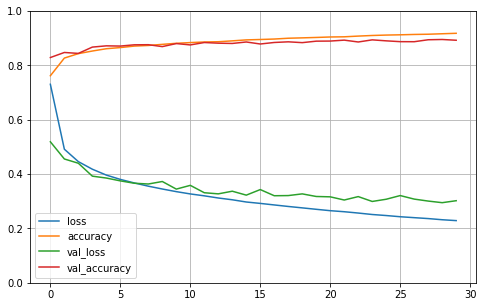

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  ##set vertical range to [0~1]
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8859


[0.3292936682701111, 0.8859000205993652]

Note that it is common to get slightly lower performance on the test set than on the validation set because the hyperparameters are tuned on the validation set, not the test set

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [47]:
np.argmax(model.predict(X_new),axis=-1)

array([9, 2, 1])

In [48]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

## Regression MLP using the sequential API

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8456 - val_loss: 2.6605
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5434 - val_loss: 0.7184
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4632 - val_loss: 0.5022
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4310 - val_loss: 0.4699
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4211 - val_loss: 0.4140
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 0.4003
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.4174
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.4105
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.4082
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.3944

## Functional API: Example: wide&deep neural network

it connects all or part of the inputs directly to the output layer, this makes possible for the neural network to leanr both deep patterns and simple rules. 

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

Modification: send a subset of the features through the wide path and a different subset through deep path

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B],outputs=[output])

In [56]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30,activation="relu",**kwargs):
        super().__init__(**kwargs) #handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, inut_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

cons: when you call the summar() method, you only get list of layers, without any information on how they are connected to each other

### save and load
model.save("my_keras_model.h5")
model = keras.mdoels.load_model("my_keras_model.h5")

#### using callbacks

In [ ]:
the fit method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. 

### checkpoint and early stopping

In [57]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid,y_valid),
                callbacks=[checkpoint_cb,early_stopping_cb])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Fine-Tuning Neural Network Hyperparameters

In [ ]:
Option:
try many combinations of hyperparameter and see which one works best on the validation set.add
1.Use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space
2.use randomized search rather than grid search
3.

hyperparameter python libraries:
1.hyperopt
2.hyperas
3.keras tuner
4.scikit-optimize
5.spearmint
6.hyperband
7.sklearn-deap

hyperparameter optimization services:
1.google cloud ai platforms
2.arimo
3.sigOpt
4.CallDesks' Oscar

Overfitting:
Overfitting refers to a model that models the training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.



#### K fold cross validation
In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. 

In [ ]:
Transfer learning:
to generalize new datasets:
if you have already trained a model to recognize faces in puctures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first entwork. This way network will not have to learn the low level structures, it will only have to leran the higher-level strcutures.

Number of hidden layers:
for most of problems, start with just one or two hidden layers. for more complex problems, ramp up number of hidden layers until overfitting the training set.

Number of Neurons per hidden layers
size them to form a pyramid, with fewer and fewer neurons at each layer, but this practice it not always to be efficent.

1.try to increasing the number of neurons graudally until the ntwork starts overfitting
2.pick more layers and neurons than you actually need, then use early stopping to prevent it from overfitting.

In [ ]:
learning rate:
optimizer
batch size
activation function
number of iterations

note that optimal learning rate depends on the other hyperparameters especially the batch size-so if you modify any hyperparameter, make sure to update the learning rate as well